In [3]:
import transformers
import torch
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub as kh

In [6]:
dataset = datasets.load_dataset(
    "ZhenghanYU/CFunSet", 
    cache_dir="/home/mrb/projects/proj_2026_1/data/sft/cfun"
)

README.md: 0.00B [00:00, ?B/s]

CFunSet.json:   0%|          | 0.00/219M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/164200 [00:00<?, ? examples/s]

In [8]:
# 读取 rjoke dev.tsv.gz 数据集
import gzip
import pandas as pd
import csv

# 读取压缩的 TSV 文件
file_path = "/home/mrb/projects/proj_2026_1/data/sft/raw/rjoke/dev.tsv.gz"

# 根据 preprocess.py 中的保存方式，需要指定 escapechar='\\'
# 因为数据是用 quoting=csv.QUOTE_NONE, escapechar='\\' 保存的
df = pd.read_csv(
    file_path, 
    sep='\t', 
    header=None, 
    names=['score', 'joke'], 
    encoding='utf-8',
    escapechar='\\',
    quoting=csv.QUOTE_NONE,
    engine='python'  # 使用 python 引擎以支持 escapechar
)

print(f"数据集大小: {df.shape}")
print(f"总共有 {len(df)} 条笑话数据")
print(f"\n数据集前几行:")
df.head(10)

数据集大小: (43246, 2)
总共有 43246 条笑话数据

数据集前几行:


,score,joke
0,1,"""I'll have a cheeseburger with a large coke,"" ..."
1,0,Who is Michael J. Fox's Favorite Football Play...
2,1,Three nurses went to heaven. Three nurses went...
3,1,Knock knock Who’s there? Abby Abby who? Abb...
4,3,A guy calls in sick to work His boss doesn't b...
5,0,How do you get your stomach pumped? Swallow a ...
6,1,"You know, Ireland has really made a comeback s..."
7,2,My last date just told me she tested HIV posit...
8,2,What did the tie say to the hat? I’ll hang aro...
9,2,Have you heard the one about the three holes i...


In [9]:
# 查看数据集的基本统计信息
print("=" * 80)
print("数据集基本信息:")
print("=" * 80)
print(f"\n列名: {df.columns.tolist()}")
print(f"\n数据类型:\n{df.dtypes}")
print(f"\n缺失值统计:\n{df.isnull().sum()}")
print(f"\n分数统计:\n{df['score'].describe()}")

# 显示笑话长度分布
df['joke_length'] = df['joke'].str.len()
print(f"\n笑话长度统计:\n{df['joke_length'].describe()}")

数据集基本信息:

列名: ['score', 'joke']

数据类型:
score     int64
joke     object
dtype: object

缺失值统计:
score    0
joke     0
dtype: int64

分数统计:
count    43246.000000
mean         1.614184
std          1.830736
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: score, dtype: float64

笑话长度统计:
count    43246.000000
mean       222.272095
std        477.971538
min          4.000000
25%         68.000000
50%         95.000000
75%        162.000000
max      39743.000000
Name: joke_length, dtype: float64


/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10638/130933601.py:31: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}

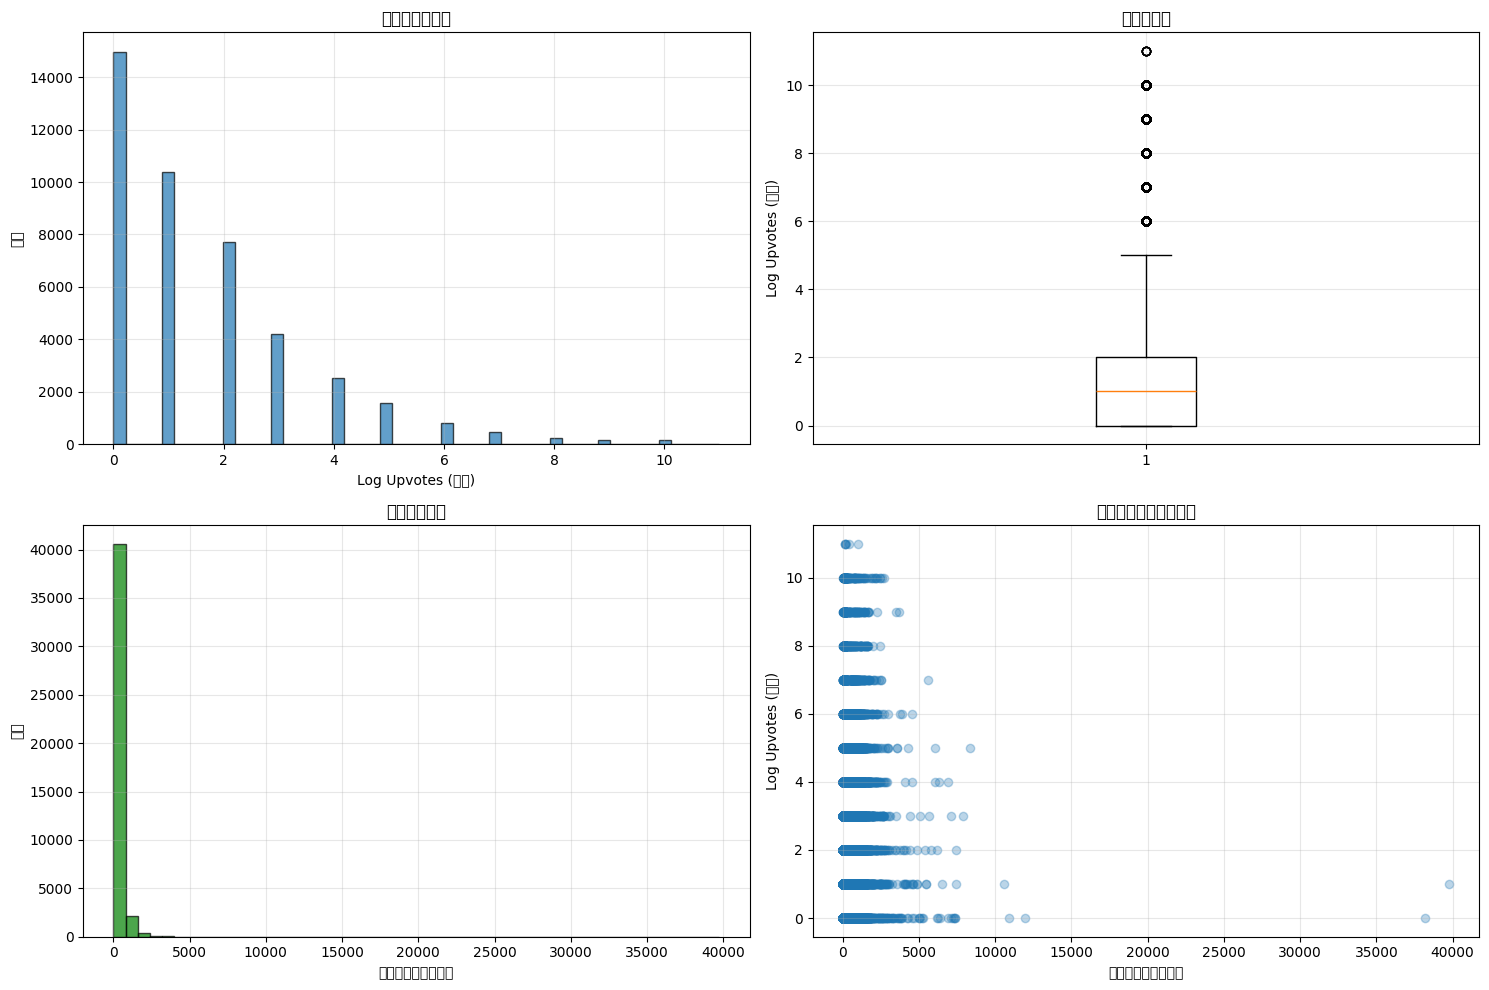

In [10]:
# 可视化1: 分数分布
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 分数的分布直方图
axes[0, 0].hist(df['score'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Log Upvotes (分数)')
axes[0, 0].set_ylabel('频数')
axes[0, 0].set_title('分数分布直方图')
axes[0, 0].grid(True, alpha=0.3)

# 分数的箱线图
axes[0, 1].boxplot(df['score'])
axes[0, 1].set_ylabel('Log Upvotes (分数)')
axes[0, 1].set_title('分数箱线图')
axes[0, 1].grid(True, alpha=0.3)

# 笑话长度分布
axes[1, 0].hist(df['joke_length'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('笑话长度（字符数）')
axes[1, 0].set_ylabel('频数')
axes[1, 0].set_title('笑话长度分布')
axes[1, 0].grid(True, alpha=0.3)

# 分数和笑话长度的散点图
axes[1, 1].scatter(df['joke_length'], df['score'], alpha=0.3)
axes[1, 1].set_xlabel('笑话长度（字符数）')
axes[1, 1].set_ylabel('Log Upvotes (分数)')
axes[1, 1].set_title('笑话长度与分数的关系')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# 展示一些样本数据
print("=" * 80)
print("随机抽样展示 10 条笑话:")
print("=" * 80)

sample_df = df.sample(n=10, random_state=42)
for idx, row in sample_df.iterrows():
    print(f"\n【样本 {idx}】")
    print(f"分数: {row['score']}")
    print(f"笑话长度: {row['joke_length']} 字符")
    print(f"笑话内容: {row['joke'][:200]}{'...' if len(row['joke']) > 200 else ''}")
    print("-" * 80)

随机抽样展示 10 条笑话:

【样本 22895】
分数: 0
笑话长度: 79 字符
笑话内容: You know what they say about Dr Seuss's daughter? She gives the best back rubs.
--------------------------------------------------------------------------------

【样本 39580】
分数: 0
笑话长度: 35 字符
笑话内容: How to Stop Procrastinating Step 1:
--------------------------------------------------------------------------------

【样本 41910】
分数: 0
笑话长度: 85 字符
笑话内容: I told my friend an oxygen joke which he didnt get at first Until he finally went "O"
--------------------------------------------------------------------------------

【样本 41229】
分数: 0
笑话长度: 66 字符
笑话内容: What do you get when you mix an emo kid and a frat boy? Deez Cuts!
--------------------------------------------------------------------------------

【样本 20815】
分数: 3
笑话长度: 112 字符
笑话内容: A man walks into a library and asks for a book on suicide The librarian says "fuck off, you won't bring it back"
--------------------------------------------------------------------------------

【样本 25633】
分数: 0

In [12]:
# 展示分数最高和最低的笑话
print("=" * 80)
print("分数最高的 5 条笑话:")
print("=" * 80)

top_jokes = df.nlargest(5, 'score')
for idx, row in top_jokes.iterrows():
    print(f"\n分数: {row['score']}")
    print(f"笑话: {row['joke'][:300]}{'...' if len(row['joke']) > 300 else ''}")
    print("-" * 80)

print("\n" + "=" * 80)
print("分数最低的 5 条笑话:")
print("=" * 80)

bottom_jokes = df.nsmallest(5, 'score')
for idx, row in bottom_jokes.iterrows():
    print(f"\n分数: {row['score']}")
    print(f"笑话: {row['joke'][:300]}{'...' if len(row['joke']) > 300 else ''}")
    print("-" * 80)

分数最高的 5 条笑话:

分数: 11
笑话: My wife said if this post gets 1000 upvotes she'll give up her anal virginity tonight! Please don't. She's out of town on business until Tuesday.
--------------------------------------------------------------------------------

分数: 11
笑话: If America is storming Area 51 then the Europeans can storm the Vatican We’ll take the aliens, you get the predators
--------------------------------------------------------------------------------

分数: 11
笑话: North Koreans believe they live in the best country in the world because they’re brainwashed by the government and the media. When every American knows that America is the best country in the world.
--------------------------------------------------------------------------------

分数: 11
笑话: A new Navy recruit has his first day on the submarine... He speaks with the officer, who assigns him his post.  "Go stand at the periscope entry-way, and make sure no unauthorized personnel touch the periscope."  The recruit follows o